# Assignment 2 Problem 3

In [1]:
#############################################################################################################################



###############################################################################################################################

In [2]:
import numpy as np

In [3]:
DS1_train = np.genfromtxt('DS1_train.txt')
DS1_test = np.genfromtxt('DS1_test.txt')

In [4]:
#DS1_train = np.genfromtxt('F:\\Winter 2018\\Applied ML\\winter 2018\\Assignments\\assignment 2\\hwk2_datasets_corrected\\DS1_train.txt')
#DS1_test = np.genfromtxt('F:\\Winter 2018\\Applied ML\\winter 2018\\Assignments\\assignment 2\\hwk2_datasets_corrected\\DS1_test.txt')

In [5]:
print(DS1_train.shape)
print(DS1_test.shape)

(2800, 21)
(1200, 21)


In [6]:
t_train = DS1_train[:,-1]
t_train = np.reshape(t_train,(-1,1))

t_test = DS1_test[:,-1]
t_test = np.reshape(t_test,(-1,1))

In [7]:
X_train = DS1_train[:,0:-1]
#print(X_train.shape)

X_test = DS1_test[:,0:-1]
#print(X_train.shape)

In [8]:
N = DS1_train.shape[0]
N1 = np.int(t_train.sum())
N2 = DS1_train.shape[0] - N1

print('No of training example',N)
print('No of positive example',N1)
print('No of negative example',N2)

No of training example 2800
No of positive example 1400
No of negative example 1400


In [9]:
Nofeatures = X_train.shape[1]
print('No of features',Nofeatures)

No of features 20


In [10]:
def EucledDistacne(X_train,X_test):
    import numpy as np
    d = np.reshape(np.sqrt(np.sum((X_train-X_test)**2,1)),(-1,1))
    return d

In [11]:
def KnnClassifier(X_train,X_test,K):
    noTestData = X_test.shape[0]
    pred = np.zeros((noTestData,1))
    for n in range (0,noTestData):
        d = EucledDistacne(X_train,X_test[n,:])
        neighbour = np.argsort(d,axis=0)[0:K]
        pred[n,:] = t_train[neighbour].mean(axis=0)
        if pred[n,:] > 0.5:
            pred[n,:] = 1
        else:
            pred[n,:] = 0
            
    return pred

In [12]:
def EvaluateClassifier(pred,t_test):
    True_Positive = np.sum(t_test*pred)
    False_Positive = (pred>t_test).sum()
    False_Negative = (pred<t_test).sum()
    True_Negative = (pred.shape[0] - pred.sum()) - False_Negative

    accuracy = (True_Positive + True_Negative)/ t_test.shape[0]
    precision = True_Positive/(True_Positive+False_Positive)
    recall = True_Positive/(True_Positive+True_Negative)
    F_measure = 2*(precision*recall)/(precision+recall)
    
    return True_Positive, False_Positive, False_Negative, True_Negative, accuracy, precision, recall,  F_measure

In [13]:
appended_data = []
import pandas as pd
K = 100
for k in range(2,K):
    pred = KnnClassifier(X_train,X_test,k)
    A = EvaluateClassifier(pred,t_test)
    A = np.reshape(A,(1,-1))
    data = pd.DataFrame(A)
    appended_data.append(data)
appended_data = pd.concat(appended_data, axis=0)

In [14]:
columns = ['True_Positive', 'False_Positive', 'False_Negative', 'True_Negative', 'accuracy', 'precision', 'recall',  'F_measure']
appended_data.columns = columns
appended_data.index= np.arange(2,K)

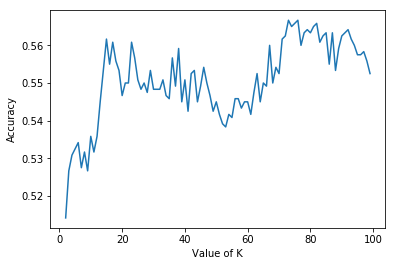

In [19]:
import matplotlib.pyplot as plt
plt.plot(appended_data.accuracy)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
#plt.savefig('F:/Winter 2018/Applied ML/winter 2018/Assignments/assignment 2/fig11.png')

In [18]:
print ("for K =" , appended_data.accuracy.idxmax()  ,"provides max accuracy")
print ("for K =" , appended_data.precision.idxmax()  ,"provides max precision")
print ("for K =" , appended_data.recall.idxmax()  ,"provides max recall")
print ("for K =" , appended_data.F_measure.idxmax()  ,"provides max Fmeasure")


for K = 73 provides max accuracy
for K = 76 provides max precision
for K = 5 provides max recall
for K = 5 provides max Fmeasure
